First 5 rows:
    PatientID  ArrivalHour  TestResult   BodyTemp  Fever  Cough
0          1           11           0  98.183806      0      0
1          2           14           0  97.469931      0      0
2          3            8           0  98.149987      0      1
3          4           13           0  99.857149      1      1
4          5           16           0  98.064665      0      0


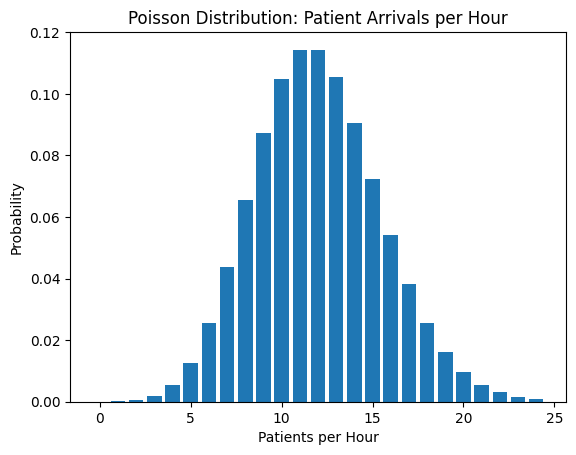

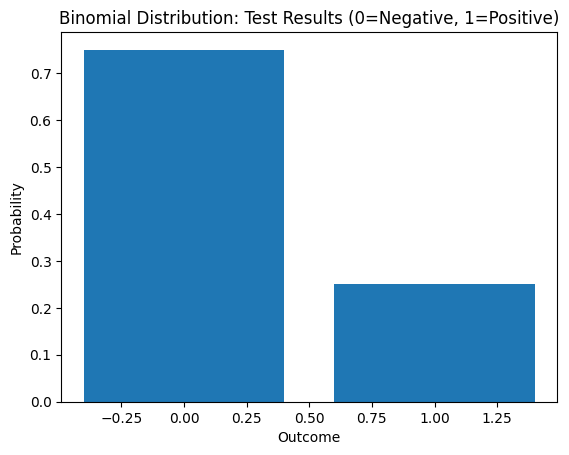

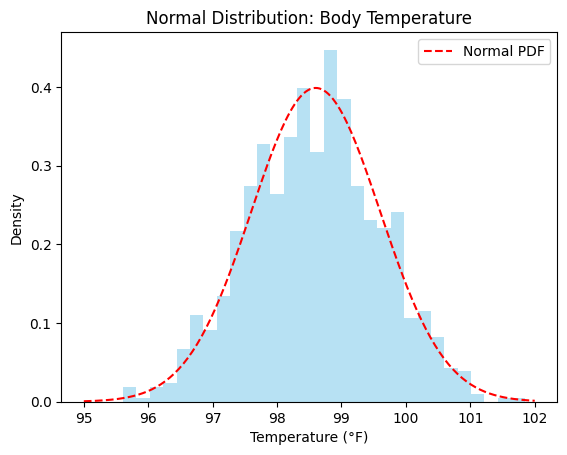


Association Rule Example:
Rule: IF Fever & Cough THEN Positive Test
Support: 0.03
Confidence: 0.23


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, binom, norm

# -------------------------
# 1. Create Dummy Patient Data (1000 patients)
# -------------------------
np.random.seed(42)
n_patients = 1000

data = pd.DataFrame({
    "PatientID": range(1, n_patients+1),
    "ArrivalHour": np.random.poisson(lam=12, size=n_patients),     # Poisson: patients per hour
    "TestResult": np.random.binomial(n=1, p=0.25, size=n_patients), # Binomial: 1 = positive, 0 = negative
    "BodyTemp": np.random.normal(loc=98.6, scale=1.0, size=n_patients), # Normal: body temperature
    "Fever": np.random.binomial(1, 0.35, n_patients),
    "Cough": np.random.binomial(1, 0.3, n_patients)
})

print("First 5 rows:\n", data.head())

# -------------------------
# 2. Distribution Analysis
# -------------------------

# Poisson: Patient arrivals per hour
lam = 12
x = np.arange(0, 25)
pmf_poisson = poisson.pmf(x, lam)

plt.bar(x, pmf_poisson)
plt.title("Poisson Distribution: Patient Arrivals per Hour")
plt.xlabel("Patients per Hour")
plt.ylabel("Probability")
plt.show()

# Binomial: Test Results (success/failure)
n, p = 1, 0.25
x_binom = [0,1]
pmf_binom = binom.pmf(x_binom, n, p)

plt.bar(x_binom, pmf_binom)
plt.title("Binomial Distribution: Test Results (0=Negative, 1=Positive)")
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.show()

# Normal: Body Temperature
mu, sigma = 98.6, 1.0
x_norm = np.linspace(95, 102, 200)
pdf_norm = norm.pdf(x_norm, mu, sigma)

plt.hist(data["BodyTemp"], bins=30, density=True, alpha=0.6, color="skyblue")
plt.plot(x_norm, pdf_norm, "r--", label="Normal PDF")
plt.title("Normal Distribution: Body Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Density")
plt.legend()
plt.show()

# -------------------------
# 3. Association Rule Example
# -------------------------

# Rule: Fever & Cough -> Positive Test
support = len(data[(data["Fever"]==1) & (data["Cough"]==1) & (data["TestResult"]==1)]) / n_patients
confidence = support / (len(data[(data["Fever"]==1) & (data["Cough"]==1)]) / n_patients)

print("\nAssociation Rule Example:")
print("Rule: IF Fever & Cough THEN Positive Test")
print(f"Support: {support:.2f}")
print(f"Confidence: {confidence:.2f}")


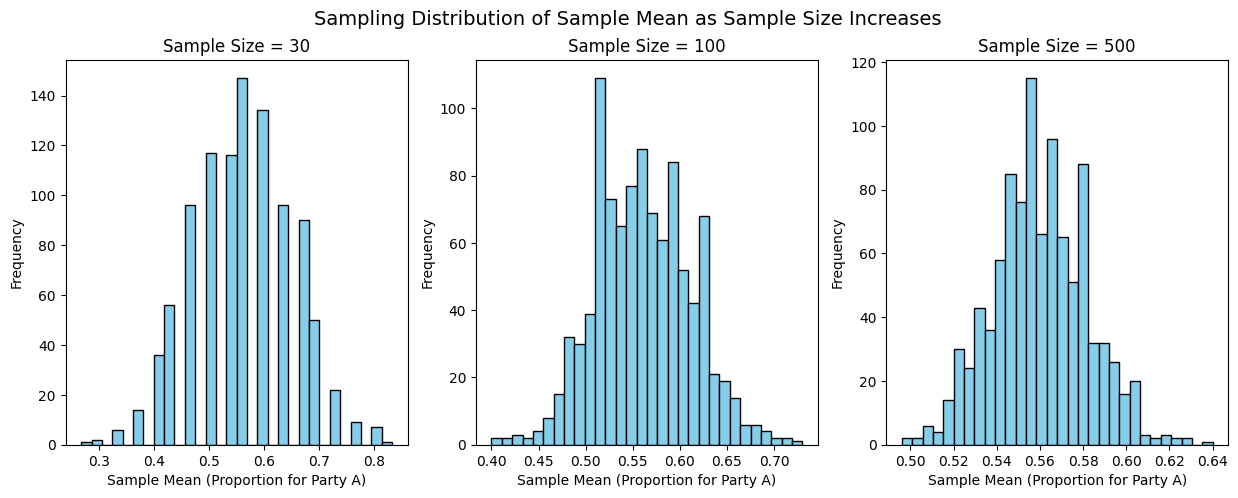

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1. Create Dummy Population Data
# -------------------------
np.random.seed(42)

# Let's assume 10,000 voters: 55% for Party A, 45% for Party B
population = np.random.binomial(1, 0.55, 10000)  # 1 = Party A, 0 = Party B

# -------------------------
# 2. Function to simulate sampling distribution
# -------------------------
def simulate_sampling_distribution(sample_size, n_samples=1000):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size=sample_size, replace=False)
        sample_means.append(np.mean(sample))
    return sample_means

# -------------------------
# 3. Generate Distributions for Different Sample Sizes
# -------------------------
sample_sizes = [30, 100, 500]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, n in enumerate(sample_sizes):
    means = simulate_sampling_distribution(n)
    axes[i].hist(means, bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Sample Size = {n}")
    axes[i].set_xlabel("Sample Mean (Proportion for Party A)")
    axes[i].set_ylabel("Frequency")

plt.suptitle("Sampling Distribution of Sample Mean as Sample Size Increases", fontsize=14)
plt.show()
